Merging all records
Done


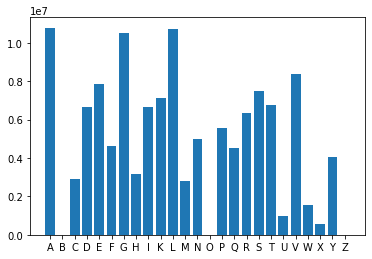

('102l_A mol:protein length:165  T4 LYSOZYME', 'MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL')


In [5]:
# This function takes a protein ID in the fasta file and gives a barchart with how many amino acids are in that proteinn


import numpy as np 
fasta=[]
f = open("pdb_seqres.txt")
for i in f:
    if i[0]=='>':
        count = 1
        header = i[1:-1]

    else:
        seq = i[:-1]
        count = 0

    if count == 0:
        fasta.append((header, seq))
        
sequences=[]     
print("Merging all records")
for i in fasta:
    
    for j in i[1]:
        sequences.append(j)
print("Done")


import matplotlib.pyplot as plt


labels, counts = np.unique(sequences,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)
plt.show()
print(fasta[1]) 

the protein is MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRVKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG


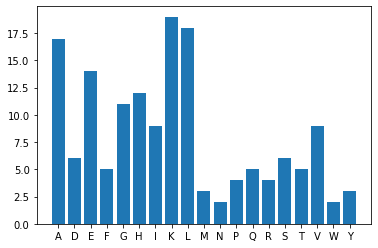

In [8]:

# This function takes a protein ID in the fasta file and gives a barchart with how many amino acids are in that protein sequence
import matplotlib.pyplot as plt

def barchart(name):
    for i in fasta: 
        if name in i[0]:
            protein=i[1]
            print('the protein is', protein)
    new=[]
    for j in protein:
           new.append(j)

    labels, counts = np.unique(new,return_counts=True)
    ticks = range(len(counts))
    plt.bar(ticks,counts, align='center')
    plt.xticks(ticks, labels)
    plt.show()
    
barchart("101m")

In [2]:
# This is a list of proteins which are confirmed to all have amino_Acids inside

protein_list=["1WR5",
'2DPZ',
'4CUT',
'3G4I',
'1OOF',
'3B7A',
'7REK',
'9ICR',
'7BEV',
'101M',
'1B47',
'6SAE',
'2TMV',
'1PVO',
'4P5O',
'1M20',
'1J0O',
'2OVQ',
'6E6O',
'2F42',
'2IO3',
'6URZ',
'5TUW',
'6DIK',
'4PHL',
'1YXH',
'3Q4Y',
'4EJO',
'2ERL',
'6G31',
'2YKZ',
'4AAL',
'1CTD',
'3JB9',
'5WVC',
'7AXI',
'2ELC',
'1O83',
'3GBR',
'3BVF']

# This code writes a protein list to lowercase letters


for i in range(len(protein_list)):
    protein_list[i] = (protein_list[i]).lower()
    
print(protein_list)

['1wr5', '2dpz', '4cut', '3g4i', '1oof', '3b7a', '7rek', '9icr', '7bev', '101m', '1b47', '6sae', '2tmv', '1pvo', '4p5o', '1m20', '1j0o', '2ovq', '6e6o', '2f42', '2io3', '6urz', '5tuw', '6dik', '4phl', '1yxh', '3q4y', '4ejo', '2erl', '6g31', '2ykz', '4aal', '1ctd', '3jb9', '5wvc', '7axi', '2elc', '1o83', '3gbr', '3bvf']


Done


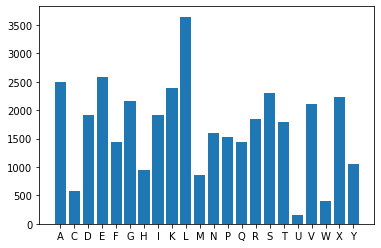

In [9]:
#A code that graphs the frequency of amino acids from all the alpha helix

#graph for alpha helix (all together)


amino=[]
for i in fasta:
    for k in protein_list:
        if k in i[0]:
            for j in i[1]:
                amino.append(j)
print("Done")
import matplotlib.pyplot as plt
labels, counts = np.unique(amino,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)
plt.show()


In [2]:
#Writes a pdb_list to a csv file

def write_csv(PDB_list):
    g = open("PDB_alpha_beta","w")
    writer=csv.writer(g)
    
    header = ["ID","ALPHA","BETA"]
    writer.writerow(header)
    for i in PDB_list:
        data = [i,helix[i],beta_sheet[i]]
        writer.writerow(data)
        
    g.close()


In [15]:
from Bio.PDB import *


def seq_getter(record):
    seq_combined = []
    seq_in_chains = []
    

     # run parser
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('struct', record)    

     # iterate each model, chain, and residue
     # printing out the sequence for each chain

    i = 1
    for model in structure:
        for chain in model:
           # print("Chain", i)
            i += 1
            seq = []
            
            for residue in chain:
                
                if residue.resname != "HOH":   # don't include HOH
                    seq.append(residue.resname) # for list of separate chains
                    seq_combined.append(residue.resname)
                
            #print(','.join(seq))
            #print(seq)
            
            seq_in_chains.append(seq)    # for list of separate chains
            
    
    return seq_combined, seq_in_chains





#This functions take a pdb file, and counts how many helix asnd beta sheets are inside. 

def check(filename):
    f = open(filename)
    helix_count = 0
    sheet_count = 0
    for i in f:    # it is more efficient to do it in a single loop, otherwise you do twice the amount of loops
        if "HELIX  " in i:
            helix_count = helix_count + 1
        elif "SHEET   " in i:
            sheet_count = sheet_count +1
    f.close()      
    return helix_count, sheet_count

In [16]:
# FUNCTION TO GET DATA

import os, glob

def protein_info(directory):
    helixes = []
    sheets = []
    sequences = []
    name = []
    length = []
    chains = []


    counter = 0
    
    for filename in glob.glob(directory):
        f = os.path.join(directory, filename)

        # checking if it is a file
        if os.path.isfile(f):
            counts = check(f)  # getting the number of sheets and helixes
            helixes.append(counts[0])
            sheets.append(counts[1])
            sequences.append(seq_getter(f)[0])
            name.append(filename)
            length.append(len(seq_getter(f)[0]))
            chains.append(len(seq_getter(f)[1]))

        counter = counter + 1
        if counter == 500:   # CHANGE COUNTER LIMIT TO INCLUDE MORE PROTEIN SEQUENCES
            break
                
    return name, length, chains, helixes, sheets, sequences

directory = "/Volumes/UCG Hard D./PDB Files/pdb//*//*.ent"
data = protein_info(directory)

names = data[0]
length = data[1]
chains = data[2]
helixes = data[3]
sheets = data[4]
sequences = data[5]

In [18]:
import pandas as pd  # converting the data to a pandas dataframe

df = pd.DataFrame(list(zip(names, helixes, sheets, sequences, length, chains)), columns = ["names", "helices", "sheets","sequence", "length", "chains"])

df.head()


,names,helices,sheets,sequence,length,chains
0,/Volumes/UCG Hard D./PDB Files/pdb/00/pdb200d.ent,0,0,"[DT, DA, DA, DC, DC, DC, DT, DA, DA, DC, DC, DC]",12,2
1,/Volumes/UCG Hard D./PDB Files/pdb/00/pdb200l.ent,11,2,"[MET, ASN, ILE, PHE, GLU, MET, LEU, ARG, ILE, ...",166,1
2,/Volumes/UCG Hard D./PDB Files/pdb/00/pdb300d.ent,0,0,"[G, U, G, G, U, C, U, G, A, U, G, A, G, G, C, ...",47,2
3,/Volumes/UCG Hard D./PDB Files/pdb/00/pdb400d.ent,0,0,"[5CM, DG, DG, DC, 5CM, DG, 5CM, DG, DG, DC, 5C...",12,2
4,/Volumes/UCG Hard D./PDB Files/pdb/00/pdb100d.ent,0,0,"[C, DC, DG, DG, DC, DG, DC, DC, DG, G, SPM, C,...",21,2


In [19]:
df.to_csv("protein_new.csv", index = True)  # creating a csv file with the data


In [2]:
import pandas as pd

file = pd.read_csv("protein_new.csv")
file.head()

,Unnamed: 0,names,helices,sheets,sequence,length,chains
0,0,/Volumes/UCG Hard D./PDB Files/pdb/00/pdb200d.ent,0,0,"['DT', 'DA', 'DA', 'DC', 'DC', 'DC', 'DT', 'DA...",12,2
1,1,/Volumes/UCG Hard D./PDB Files/pdb/00/pdb200l.ent,11,2,"['MET', 'ASN', 'ILE', 'PHE', 'GLU', 'MET', 'LE...",166,1
2,2,/Volumes/UCG Hard D./PDB Files/pdb/00/pdb300d.ent,0,0,"['G', 'U', 'G', 'G', 'U', 'C', 'U', 'G', 'A', ...",47,2
3,3,/Volumes/UCG Hard D./PDB Files/pdb/00/pdb400d.ent,0,0,"['5CM', 'DG', 'DG', 'DC', '5CM', 'DG', '5CM', ...",12,2
4,4,/Volumes/UCG Hard D./PDB Files/pdb/00/pdb100d.ent,0,0,"['C', 'DC', 'DG', 'DG', 'DC', 'DG', 'DC', 'DC'...",21,2


In [9]:
# WORKING ML MODEL TO PREDICT BETA SHEET USING NAIVE BAYES CLASSIFICATION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

def predict_beta(dataset):

    y = dataset.sheets
    X = dataset.sequence

    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)


    #to change from words to numbers

    vect = CountVectorizer()
    counts = vect.fit_transform(X_train.values)
    # print(counts)

    classifier = MultinomialNB() #this means it's a NB model
    targets=y_train.values  #need to put  (.value) because otherwise takes into consideration the indeces  
    classifier.fit(counts,targets)

    counts_test = vect.transform(X_test.values)
    y_pred = classifier.predict(counts_test)

    #df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
    #print(df)
    #mat=confusion_matrix(y_test,y_pred)
    #print(mat)
    #print('Accuracy', accuracy_score(y_test,y_pred))
    
    return accuracy_score(y_test, y_pred)

In [4]:
scores = []

dataset = pd.read_csv('protein_new.csv',encoding='latin-1')

for i in range(500): # running the model 500 times
    scores.append(predict_beta(dataset))
    
print("Average accuracy score", sum(scores)/500)
print("Maximum accuracy score:",max(scores))
print("Minimum accuracy score:", min(scores))


Average accuracy score 0.8371199999999998
Maximum accuracy score: 0.95
Minimum accuracy score: 0.7


In [10]:
scores.append(predict_beta(dataset))